In [1]:
# Import the libraries
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split 

#### About the Digits Dataset

Digits is a dataset of handwritten digits. <BR>
Each feature is the intensity of one pixel of an 8 x 8 image.<BR>
Therefore there are 64 intensity related features.<BR>
The sklearn library provides an inbuilt function load_digits(), to load this dataset.<BR>


In [2]:
# Load digits dataset
digits = datasets.load_digits()

# Create feature matrix
X = digits.data

# Create target vector
y = digits.target

View the number of samples in the dataset.

In [3]:
X.data.shape

(1797, 64)

So, we see that there is data for  1797 images and 64 features for each image.<br> 
View the feature values of a tuple<br> There are 64 values in each tuple, as explained above.

In [4]:
# View the first observation's feature values
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


#### View the actual image from characteristics

Let us now view the actual image by using a gray scale graph and the given 64 features<br>
The matshow() method takes an input array and displays it in the given color scale<br>
The digits in sklearn dataset are of much lower resolution than the original MNIST datset images which were 28×28 pixels.<br>

In [6]:
# Visualize the observation's feature values as an image
def showdigit(i):
    #We first set the colomap to grayscale
    plt.gray() 
    plt.figure(figsize = [1,1])

    #Choose the observation/tuple to be displayed.
    plt.matshow(digits.images[i]) 

    #Show the grayscale plot
    plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 72x72 with 0 Axes>

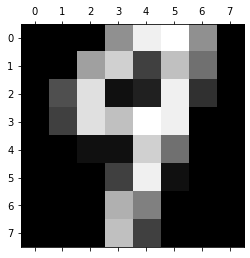

In [7]:
showdigit(325)

### Fitting the Perceptron model

In [8]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 9
    fig = plt.figure(figsize=(8,8))
    for j in range(nplots):
        plt.subplot(3,3,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

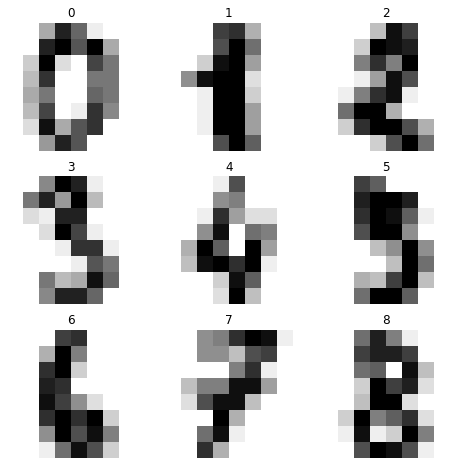

In [9]:
plot_multi(0)

### Design our basic MLP

We detine a Multi-Layer-Perceptron with just one hidden layer<br>
We therefore have 3 layers : <br>
Input Layer : Our images have 64 attributes or features. Hence our input layer will have 64 neurons<br>
Output Layer: We expect a 0-9 digits classification. So we can have 10 neurons in the output, one for each output.<br>
Hidden Layer: We can arbitrarily choose the number of neurons in this layer. TO achieve a dimension reduction here , we use say, 15 neurons. <br>
<br>
Also, we will build a dense of FULLY CONNECTED neural network

#### Create Test and Train Data Sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
print(X_train.shape )

(1437, 64)


In [12]:
print( X_test.shape)

(360, 64)


In [13]:
print(y_train.shape)

(1437,)


In [14]:
print( y_test.shape)

(360,)


In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True,max_iter=500)

In [16]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 2.15249593
Iteration 2, loss = 1.68980144
Iteration 3, loss = 1.25918855
Iteration 4, loss = 0.90101278
Iteration 5, loss = 0.64705257
Iteration 6, loss = 0.50130506
Iteration 7, loss = 0.39892879
Iteration 8, loss = 0.34805643
Iteration 9, loss = 0.28101277
Iteration 10, loss = 0.25480912
Iteration 11, loss = 0.21190128
Iteration 12, loss = 0.20743182
Iteration 13, loss = 0.18213260
Iteration 14, loss = 0.15995221
Iteration 15, loss = 0.15057888
Iteration 16, loss = 0.13909420
Iteration 17, loss = 0.12906573
Iteration 18, loss = 0.11858621
Iteration 19, loss = 0.11661341
Iteration 20, loss = 0.10772064
Iteration 21, loss = 0.09977674
Iteration 22, loss = 0.09247116
Iteration 23, loss = 0.09095041
Iteration 24, loss = 0.08713646
Iteration 25, loss = 0.08637697
Iteration 26, loss = 0.08517056
Iteration 27, loss = 0.07921742
Iteration 28, loss = 0.08041866
Iteration 29, loss = 0.07065617
Iteration 30, loss = 0.06604370
Iteration 31, loss = 0.07067165
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.1, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

Now, we will test our model with the test set

In [17]:
predictions = mlp.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9611111111111111

In [19]:
mlp.n_layers_

3